R2 basic tutorial
=======

In this tutorial you will learn how to use the Python API of R2 (http://www.es.lancs.ac.uk/people/amb/Freeware/R2/R2.htm).
Start by importing the R2 master class from the API (Application Programming Interface).

1 Basics imports
---
Just import basic packages and the R2 API as a module (note : you will need to change the path for it, here we assume you launched the jupyter from inside the /examples/jupyter-notebook folder).

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

from api.R2 import R2

API path =  /home/tsom/Desktop/desktop2/pyr2/src/api
pyR2 version =  1.1.0


2 Create R2 object, import data and plot pseudo section
----
The first step is to create an object out of the R2 class, let's call it ```k``` . This is the main object we are going to interact with. Then the second step is to read the data from a survey file. Here we choose a csv file from the Syscal Pro containing resistivity data only. Note then when importing the survey data, the object automatically search for reciprocal measurements and will delete the eventual dummy measurements (we assume normal and reciprocal are contained in the same file for now).

In [2]:
k = R2() # create an R2 object in a working directory (can also set using k.setwd())
k.createSurvey('../src/api/test/syscalFile.csv', ftype='Syscal') # read the survey file

Working directory is: /home/tsom/Desktop/desktop2/pyr2/src/api/invdir
clearing the dirname
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %


We can plot the pseudosection and display errors based on reciprocal measurements.

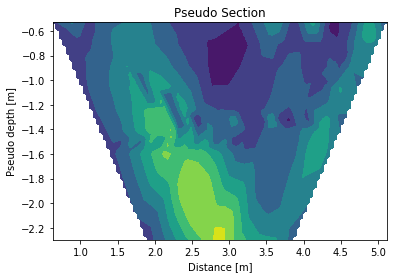

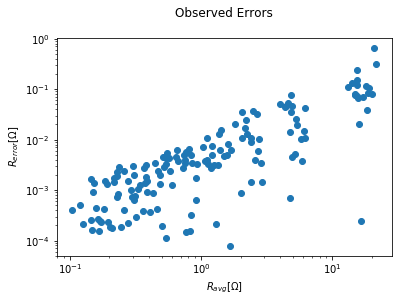

In [3]:
k.pseudo(contour=True)
k.plotError()

Different errors models are available to be fitted for DC data:
- a imple linear model: ```k.linfit()```
- a power law model: ```k.pwlfit()```
- a linear mixed effect model: ```k.lmefit()``` (to be implemented soon)

Error model is: R_err = 0.005*(R_n/r)^1.126 (R^2 = 0.9643) 
or simply R_err = 0.0*(R_n/r)^1.1


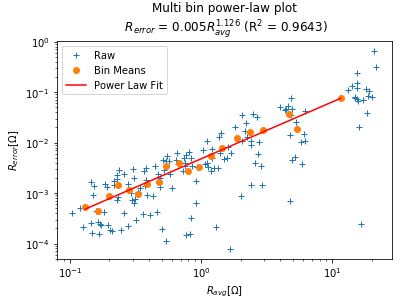

In [4]:
k.pwlfit()

In [5]:
k.lmefit()  ### requires R and lme4 package for R installed

lmefit NOT sdf YET
lmefit NOT IMPLEMENTED YET


AttributeError: 'Survey' object has no attribute 'dirname'

In [6]:
k.write2protocol(err=True)
k.apiPath
k.dirname
import shutil
shutil.move(os.path.join(k.dirname,'protocol.dat'), os.path.join(k.dirname,'protocol2.dat'))



'/home/tsom/Desktop/desktop2/pyr2/src/api/invdir/protocol2.dat'

In [ ]:
k()

4 Inversion using R2 wrapper
----

The inversion takes place in the specify working directory of the R2 object (```R2.setwd()```).
First we create the mesh (quadrilateral by default, but triangular will also be available). We can display the mesh using the ```showMesh()```method.

computed DOI : -2.17
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
Mesh plotted in 0.17655 seconds


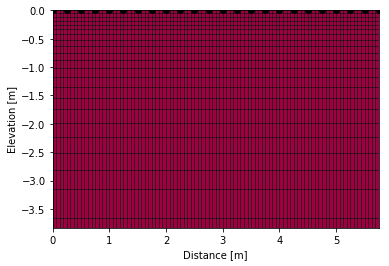

In [5]:
k.createMesh(typ='quad') # generate quadrilateral mesh
k.showMesh()

Then we invert the data. The routine to create the ```R2.in``` is automatically called with default parameters but we can modify them using ```k.param[nameOfParameters] = parameterValue```. The name of the parameter is the same as in the R2 manual.

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

-------- Main inversion ---------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 26 - 11 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   154     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.53798E+02

 >> Total Memory required is:          0.238 Gb

   Iteration   1
     Initial RMS Misfit:        26.

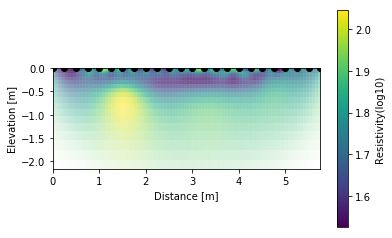

In [6]:
k.param['data_type'] = 1 # using log of resistitivy
k.invert(iplot=True) # this will do the inversion and plot the results at the end from the _res.dat file

In a nutshell
===
These few lines of code will be able to import the data, plot a pseudo section and invert them using all default parameters. Nothing else is needed.

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/api/invdir
clearing the dirname
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
Create Rectangular mesh...
computed DOI : -2.17
Using a quadrilateral mesh
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

-------- Main inversion ---------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 26 - 11 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o

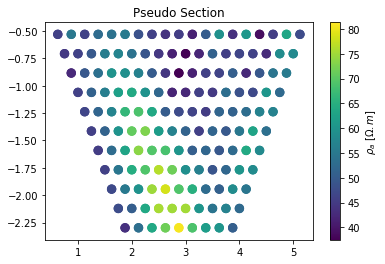

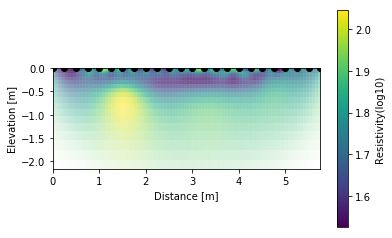

In [7]:
k = R2() # create an R2 object in a working directory (can also set using k.setwd())
k.createSurvey('../src/api/test/syscalFile.csv', ftype='Syscal') # read the survey file
k.pseudo() # plot pseudo section
k.invert(iplot=True) # does the inversion (generate quand mesh and use default R2.in settings)

The ```k``` variable is an R2 object:

In [8]:
print(k)